In [3]:
from fisher import Fisher
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib
from cosmology import Cosmology
plt.rcParams['figure.figsize'] = [10, 5]

In [4]:
M_path = "cache/_M/"

In [5]:
N0_file = "cache/_N0/S4/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher = Fisher(N0_file, N0_offset=2)
fisher.setup_bispectra(M_path)

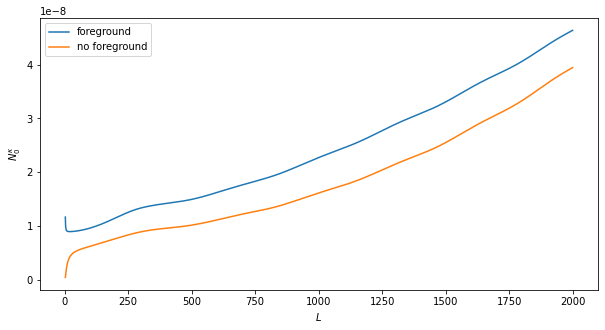

In [6]:
ellmax = 2000
N0_file = "cache/_N0/S4_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file, 2, True)
N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True)
ells = np.arange(ellmax + 1)
plt.figure()
plt.plot(ells[2:], N0_kappa[2:], label="foreground")
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")

N0_file = "cache/_N0/S4/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file)

N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True, ell_factors=True)
ells = np.arange(ellmax + 1)
plt.plot(ells[2:], N0_kappa[2:], label="no foreground")
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")
plt.legend()
plt.show()

In [7]:
Lmax = 4000
dL = 2
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/S4/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file, N0_offset=2, N0_ell_factors=True)
print("No foreground (S/N)")
print("---------------------------")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal kI (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Ig (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Igk (353) = {np.sqrt(F_opt)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")


No foreground (S/N)
---------------------------
kkw = 2.5769398320103885
kkw + one N_k= 3.200482199296858
kkw + no N_k= 3.638892965705611
ggw = 0.7310669358071606
gkw = 13.050166132958141
IIw (353) = 0.6256865453597549
Ikw (353) = 2.840538654303128
Igw (353) = 16.496526030639718
Matrix([[kk, kg], [gk, gg]])
optimal kg= 17.036359687964815
Matrix([[kk, ky], [yk, yy]])
optimal kI (353) = 3.6797683040774847
Matrix([[yy, yg], [gy, gg]])
optimal Ig (353) = 17.451250189666034
Matrix([[yy, yg, yk], [gy, gg, gk], [ky, kg, kk]])
optimal Igk (353) = 22.12960789187964
---------------------------
Time = 470.3037989139557


In [8]:
Lmax = 4000
dL = 2
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/S4_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file, N0_offset=2, N0_ell_factors=False)
print("Foreground (baseline) (S/N)")
print("---------------------------")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal kI (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Ig (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"optimal Igk (353) = {np.sqrt(F_opt)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")


Foreground (baseline) (S/N)
---------------------------
kkw = 1.9651171462074042
kkw + one N_k= 2.5779533234907603
kkw + no N_k= 3.037990547705926
ggw = 0.611963215636641
gkw = 10.273140817816348
IIw (353) = 0.5099025589769409
Ikw (353) = 2.2402018202198954
Igw (353) = 13.596489244524356
Matrix([[kk, kg], [gk, gg]])
optimal kg= 13.199764931578526
Matrix([[kk, ky], [yk, yy]])
optimal kI (353) = 2.846891842134476
Matrix([[yy, yg], [gy, gg]])
optimal Ig (353) = 14.376948168666189
Matrix([[yy, yg, yk], [gy, gg, gk], [ky, kg, kk]])
optimal Igk (353) = 17.747090235478826
---------------------------
Time = 458.4894828796387


Matrix([[kk]])
optimal k = 2.5672185881013387


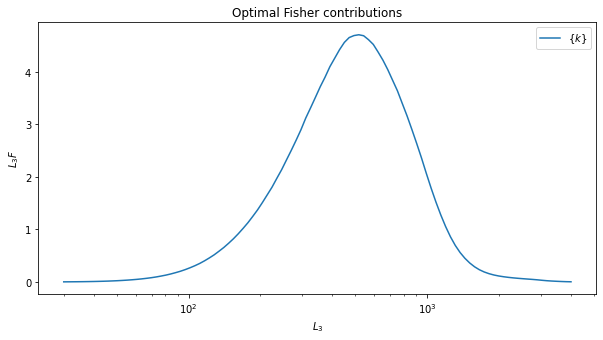

Time = 16.036309957504272


In [9]:
t0 = time.time()
N0_file = "cache/_N0/S4/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file, 2, True)
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
F_opt = fisher.get_optimal_bispectrum_Fisher("k", Ls=Ls, Ntheta=100, f_sky=0.4, nu=353e9, save_array=True)
print(f"optimal k = {np.sqrt(F_opt)}")
F_k = fisher.opt_F
Ls = fisher.opt_Ls
plt.semilogx(Ls, Ls*F_k, label="$\{k\}$")
plt.ylabel("$L_3F$")
plt.xlabel("$L_3$")
plt.title("Optimal Fisher contributions")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, kg], [gk, gg]])
optimal kg = 17.02448960888097


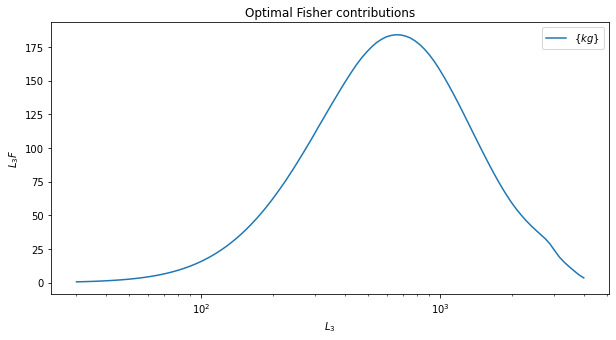

Time = 126.4165689945221


In [10]:
t0 = time.time()
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Ls=Ls, Ntheta=100, f_sky=0.4, nu=353e9, save_array=True)
print(f"optimal kg = {np.sqrt(F_opt)}")
F_kg = fisher.opt_F
Ls = fisher.opt_Ls
plt.semilogx(Ls, Ls*F_kg, label="$\{kg\}$")
plt.ylabel("$L_3F$")
plt.xlabel("$L_3$")
plt.title("Optimal Fisher contributions")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[gg, gy], [yg, yy]])
optimal gI = 17.447394612906805


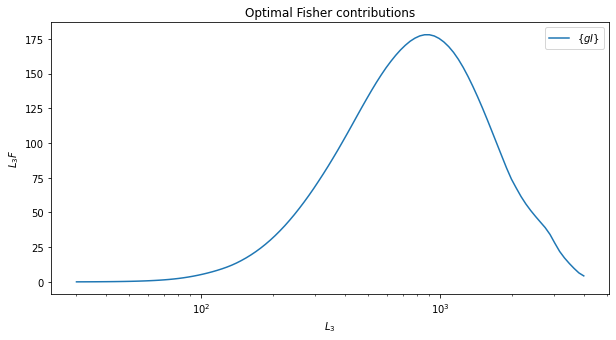

Time = 128.06853604316711


In [11]:
t0 = time.time()
F_opt = fisher.get_optimal_bispectrum_Fisher("gI", Ls=Ls, Ntheta=100, f_sky=0.4, nu=353e9, save_array=True)
print(f"optimal gI = {np.sqrt(F_opt)}")
F_kg = fisher.opt_F
Ls = fisher.opt_Ls
plt.semilogx(Ls, Ls*F_kg, label="$\{gI\}$")
plt.ylabel("$L_3F$")
plt.xlabel("$L_3$")
plt.title("Optimal Fisher contributions")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, ky], [yk, yy]])
optimal gI = 3.666184575738305


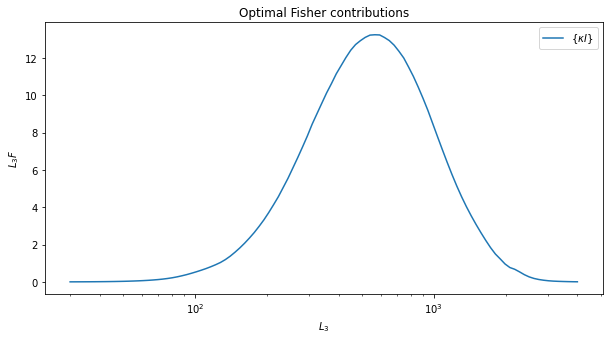

Time = 128.3675730228424


In [12]:
t0 = time.time()
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Ls=Ls, Ntheta=100, f_sky=0.4, nu=353e9, save_array=True)
print(f"optimal gI = {np.sqrt(F_opt)}")
F_kI = fisher.opt_F
Ls = fisher.opt_Ls
plt.semilogx(Ls, Ls*F_kI, label="$\{\kappa I\}$")
plt.ylabel("$L_3F$")
plt.xlabel("$L_3$")
plt.title("Optimal Fisher contributions")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, kg, ky], [gk, gg, gy], [yk, yg, yy]])
optimal kgI = 22.118102893671324


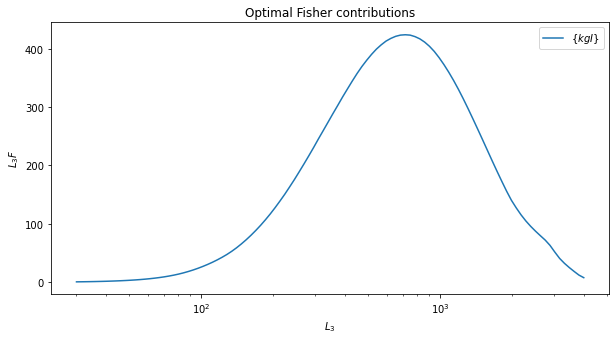

Time = 570.348653793335


In [13]:
t0 = time.time()
F_opt = fisher.get_optimal_bispectrum_Fisher("kgI", Ls=Ls, Ntheta=100, f_sky=0.4, nu=353e9, save_array=True)
print(f"optimal kgI = {np.sqrt(F_opt)}")
F_kgI = fisher.opt_F
Ls = fisher.opt_Ls
plt.semilogx(Ls, Ls*F_kgI, label="$\{kgI\}$")
plt.ylabel("$L_3F$")
plt.xlabel("$L_3$")
plt.title("Optimal Fisher contributions")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk]])
Matrix([[gg]])
Matrix([[yy]])


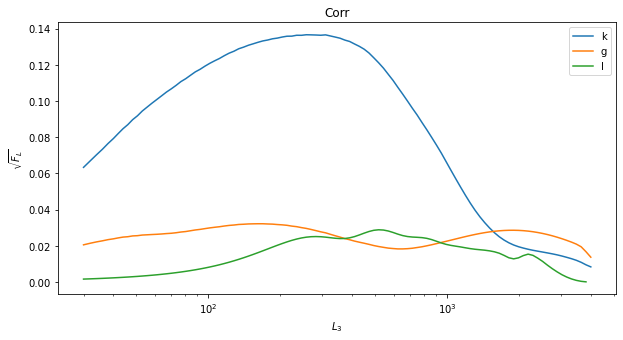

Time = 74.7164409160614


In [14]:
t0 = time.time()
N0_file = "cache/_N0/S4/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file, 2, True)
typs = ["k", "g", "I"]
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
for typ in typs:
    Ls, F_L = fisher.get_F_L(typ, Ls=Ls, Ntheta=100, nu=353e9)
    plt.semilogx(Ls, np.sqrt(F_L), label=f"{typ}")
plt.ylabel("$\sqrt{F_L}$")
plt.xlabel("$L_3$")
plt.title("Corr")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

Matrix([[kk, kg], [gk, gg]])
Matrix([[kk, ky], [yk, yy]])
Matrix([[gg, gy], [yg, yy]])
Matrix([[kk, kg, ky], [gk, gg, gy], [yk, yg, yy]])


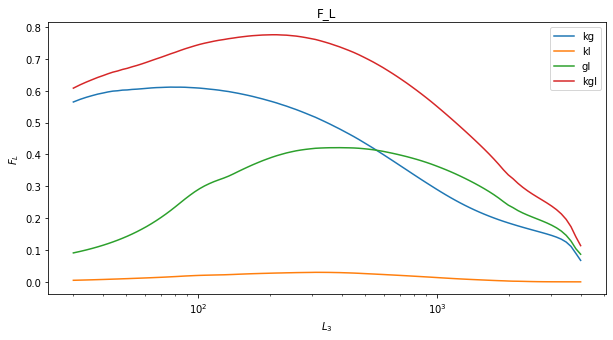

Time = 1000.4104998111725


In [15]:
t0 = time.time()
N0_file = "cache/_N0/S4/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file, 2, True)
typs = ["kg", "kI", "gI", "kgI"]
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
for typ in typs:
    Ls, F_L = fisher.get_F_L(typ, Ls=Ls, Ntheta=100, nu=353e9)
    plt.semilogx(Ls, F_L, label=f"{typ}")
plt.ylabel("$F_L$")
plt.xlabel("$L_3$")
plt.title("F_L")
plt.legend()
plt.show()
t1 = time.time()
print(f"Time = {t1 - t0}")

In [16]:
from cosmology import Cosmology
from scipy.interpolate import InterpolatedUnivariateSpline
cosmo = Cosmology()
omega_Ls, omega_ps = cosmo.get_postborn_omega_ps(8000)
omega_ps_spline = InterpolatedUnivariateSpline(omega_Ls, omega_ps)

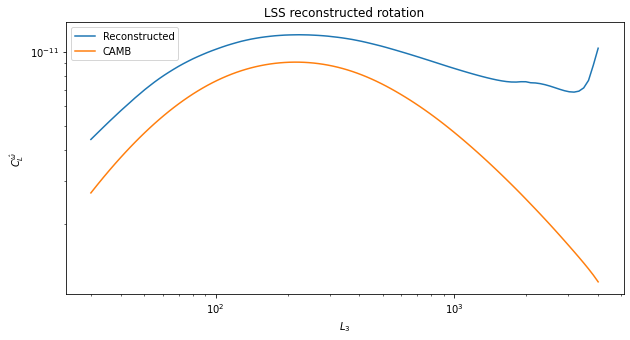

In [17]:
plt.loglog(Ls, omega_ps_spline(Ls)/F_L, label="Reconstructed")
plt.loglog(Ls, omega_ps_spline(Ls), label="CAMB")
plt.ylabel("$C^{\hat{\omega}}_{L}$")
plt.xlabel("$L_3$")
plt.title("LSS reconstructed rotation")
plt.legend()
plt.show()

In [18]:
Ntheta = 100
f_sky = 0.4
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
t0 = time.time()
N0_file = "cache/_N0/S4/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file, 2, True)
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
print("----------------------------")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Ls=Ls, Ntheta=100, f_sky=f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Ls=Ls,Ntheta=100, f_sky=f_sky, nu=353e9)
print(f"optimal kI (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Ls=Ls, Ntheta=100, f_sky=f_sky, nu=353e9)
print(f"optimal Ig (353) = {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Igk", Ls=Ls, Ntheta=100, f_sky=f_sky, nu=353e9)
print(f"optimal Igk (353) = {np.sqrt(F_opt)}")
print("----------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

kkw = 2.5672185882837426
kkw + one N_k= 3.170988725702037
kkw + no N_k= 3.612553663899008
ggw = 0.727898482869226
gkw = 13.043076617634656
IIw (353) = 0.5927043762736507
Ikw (353) = 2.7831442157490347
Igw (353) = 16.293966874166166
----------------------------
Matrix([[kk, kg], [gk, gg]])
optimal kg= 17.02448960888097
Matrix([[kk, ky], [yk, yy]])
optimal kI (353) = 3.666184575738305
Matrix([[yy, yg], [gy, gg]])
optimal Ig (353) = 17.44739461290681
Matrix([[yy, yg, yk], [gy, gg, gk], [ky, kg, kk]])
optimal Igk (353) = 22.118102893671324
----------------------------
Time = 1013.183779001236


In [19]:
Lmax = 4000
dL = 2
Ntheta = 10
f_sky = 0.4
t0 = time.time()
fisher.reset_noise(N0_file, 2, True)
print("No foreground (S/N)")
print("---------------------------")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("kkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k= {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("ggw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("gkw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("IIw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"IIw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Ikw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Ikw (353) = {np.sqrt(F)}")
F = fisher.get_bispectrum_Fisher("Igw", Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, nu=353e9)
print(f"Igw (353) = {np.sqrt(F)}")
print("----------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

No foreground (S/N)
---------------------------
kkw = 2.5769398320103885
kkw + one N_k= 3.200482199296858
kkw + no N_k= 3.638892965705611
ggw = 0.7310669358071606
gkw = 13.050166132958141
IIw (353) = 0.6256865453597549
Ikw (353) = 2.840538654303128
Igw (353) = 16.496526030639718
----------------------------
Time = 37.13185405731201


2.5672185882837426
902.8078878535686
3.170988725702037
1437.5254655218503
3.612553663899008
2184.910887073737
1.9573376563970464
902.8078878535686
2.5504596495833063
1652.8049600461354
3.014124469455941
2512.116576733704
72.88436675071716


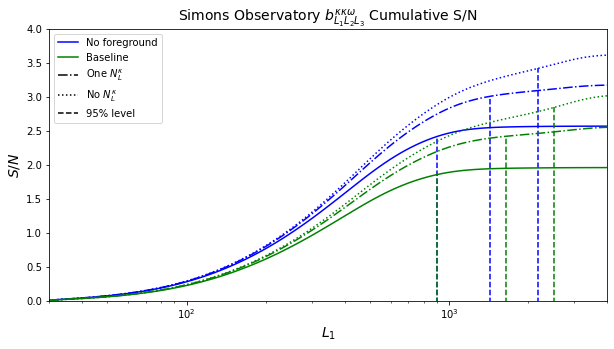

In [23]:
Nells = 500
level = 0.95
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
colors = ["blue", "green", "red"]
N0_files = ["cache/_N0/S4/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy", "cache/_N0/S4_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"]
labels = ["No foreground", "Baseline"]
linestyles = ["-", "dashdot", "dotted"]
include_N0_kappas = ["both", "one", "none"]
offsets = [2,2]
N0_ell_factors = [True, False] 
t0 = time.time()
for iii, N0_file in enumerate(N0_files):
    for jjj, include_N0_kappa in enumerate(include_N0_kappas):
        fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
        F_conv_rot_tmp = fisher.get_bispectrum_Fisher("kkw", Ls=Ls, Ntheta=100, f_sky=f_sky, arr=True, include_N0_kappa=include_N0_kappa)
        F_spline = InterpolatedUnivariateSpline(Ls, F_conv_rot_tmp)
        F_conv_rot = np.array([F_spline.integral(30, L) for L in Ls])
        print(np.sqrt(F_conv_rot[-1]))
        #SNs = np.sqrt(np.cumsum(F_conv_rot))
        SNs = np.sqrt(F_conv_rot)
        if jjj == 0:
            plt.semilogx(Ls, SNs, label=labels[iii], color=colors[iii], linestyle=linestyles[jjj])
        else:
            plt.semilogx(Ls, SNs, color=colors[iii], linestyle=linestyles[jjj])
        SN = SNs[-1]
        L_level = Ls[SNs < level*SN][-1]
        print(L_level)
        L_level_index = np.where(Ls==L_level)[0][0]
        L_levels = np.array([L_level, L_level])
        SN_levels = np.array([-0.5, SNs[L_level_index]])
        plt.plot(L_levels, SN_levels, color=colors[iii], linestyle="--")
t1 = time.time()
print(t1-t0)
plt.title("Simons Observatory $b_{L_1L_2L_3}^{\kappa\kappa\omega}$ Cumulative S/N", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$S/N$", fontsize=14)
plt.plot([1e10], [1e10], label="One $N_L^{\kappa}$", linestyle="dashdot", color="k")
plt.plot([1e10], [1e10], label="No $N_L^{\kappa}$", linestyle="dotted", color="k")
plt.plot([1e10], [1e10], label="95% level", linestyle="--", color="k")
plt.ylim(0, 4)
plt.xlim(3e1, 4e3)
plt.legend()
plt.show()

Time = 95.39649891853333


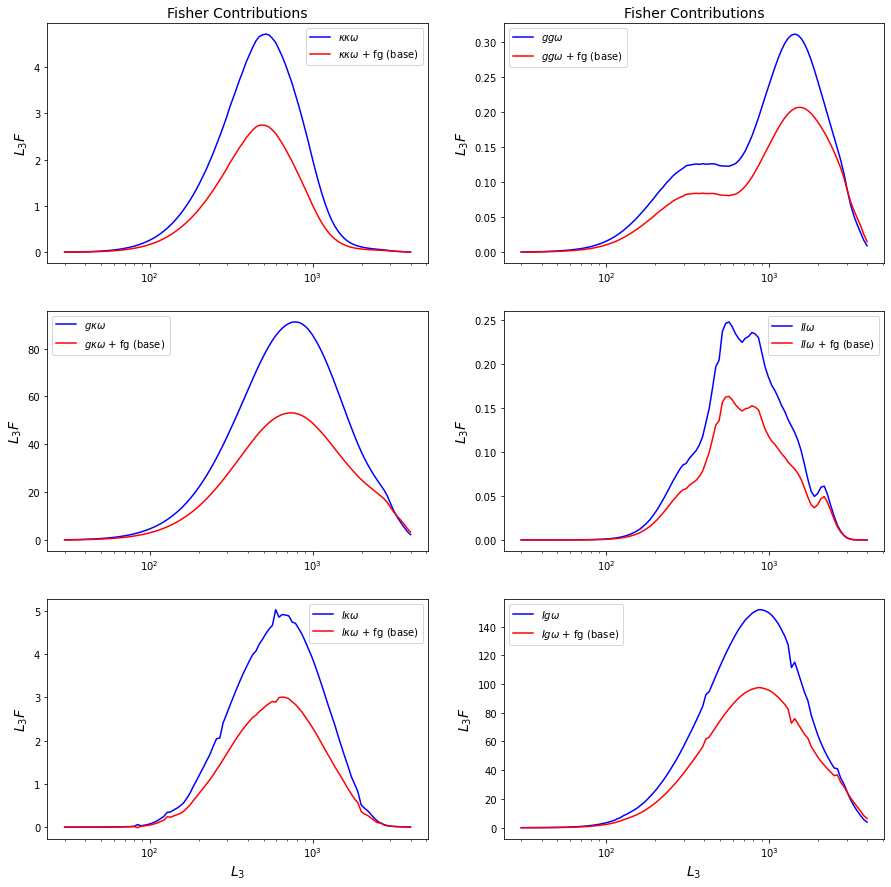

In [21]:
plt.rc('figure', facecolor='w')
Ls1 = np.arange(30,40,2)
Ls2 = np.logspace(1, 3, 100)*4
Ls = np.concatenate((Ls1,Ls2))
Ntheta=100
t0 = time.time()
label_typs = ["$\kappa\kappa\omega$", "$gg\omega$", "$g\kappa\omega$", "$II\omega$", "$I\kappa\omega$", "$Ig\omega$"]
typs = ["kkw", "ggw", "gkw", "IIw", "Ikw", "Igw"]
fig, ax = plt.subplots(3,2, figsize=[15, 15])
N0_files = ["cache/_N0/S4/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy", "cache/_N0/S4_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"]
labels = ["", " + fg (base)"]
colours = ["blue", "red"]
offsets = [2, 2]
bools = [True, False]
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, offsets[iii], bools[iii])
    for jjj, typ in enumerate(typs):
        F_conv_rot = fisher.get_bispectrum_Fisher(typ, Ls=Ls, Ntheta=Ntheta, f_sky=0.4, arr=True)
        row = jjj//2
        if jjj % 2: col = 1
        else: col = 0
        ax[row][col].semilogx(Ls, Ls*F_conv_rot, label=f"{label_typs[jjj]}{labels[iii]}", color=colours[iii])
        ax[row][col].set_ylabel("$L_3F$", fontsize=14)
        ax[row][col].legend()
        if row == 0:
            ax[row][col].set_title(f"Fisher Contributions", fontsize=14)
        elif row == 2:
            ax[row][col].set_xlabel("$L_3$", fontsize=14)
t1 = time.time()
print(f"Time = {t1 - t0}")
plt.show()

In [7]:
# CAMB
Lmax = 4000
f_sky = 0.4
N0_files = ["cache/_N0/S4/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy", "cache/_N0/S4_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"]
labels = ["no foreground", "foreground (baseline)"]
offsets = [2,2]
N0_ell_factors = [True, False] 
t0 = time.time()
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
    F = fisher.get_rotation_ps_Fisher(Lmax, M_path="cache/_M", f_sky=f_sky, auto=True, camb=True)
    print(f"SO + {labels[iii]}")
    print(f"Auto ps S/N = {np.sqrt(F)}")
    F = fisher.get_rotation_ps_Fisher(Lmax, M_path="cache/_M", f_sky=f_sky, auto=False, camb=True)
    print(f"Cross ps S/N = {np.sqrt(F)}")
    print("---------------------------")
t1 = time.time()
print(t1-t0)

SO + no foreground
Auto ps S/N = 0.629421400843594
Cross ps S/N = 29.778022066291708
---------------------------
SO + foreground (baseline)
Auto ps S/N = 0.4169137834675685
Cross ps S/N = 24.881863204530788
---------------------------
47.01682424545288


In [8]:
# My Cl_omega
Lmax = 4000
f_sky = 0.4
N0_files = ["cache/_N0/S4/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy", "cache/_N0/S4_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"]
labels = ["no foreground", "foreground (baseline)"]
offsets = [2,2]
N0_ell_factors = [True, False] 
t0 = time.time()
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
    F = fisher.get_rotation_ps_Fisher(Lmax, M_path="cache/_M", f_sky=f_sky, auto=True)
    print(f"SO + {labels[iii]}")
    print(f"Auto ps S/N = {np.sqrt(F)}")
    F = fisher.get_rotation_ps_Fisher(Lmax, M_path="cache/_M", f_sky=f_sky, auto=False)
    print(f"Cross ps S/N = {np.sqrt(F)}")
    print("---------------------------")
t1 = time.time()
print(t1-t0)

SO + no foreground
Auto ps S/N = 0.6326365574257391
Cross ps S/N = 29.78887100342444
---------------------------
SO + foreground (baseline)
Auto ps S/N = 0.4190513339525045
Cross ps S/N = 24.88422713036922
---------------------------
89.97050499916077
